<a href="https://colab.research.google.com/github/ranjithnrjk/MLops_capstone_edureka/blob/main/MLops_capstone_project_edureka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

<h1> Data collection</h1>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sudarshan-koirala/Salary-Prediciton-based-on-Years-of-Experience/master/Salary_Data.csv')

In [3]:
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


<h1> Data analysis and preprocessing</h1>

In [18]:
df.dtypes

,0
YearsExperience,float64
Salary,float64


In [19]:
df.shape

(30, 2)

In [20]:
# Checking null values
df.isna().sum()

,0
YearsExperience,0
Salary,0


<p>No null values</p>

In [21]:
# Stats
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


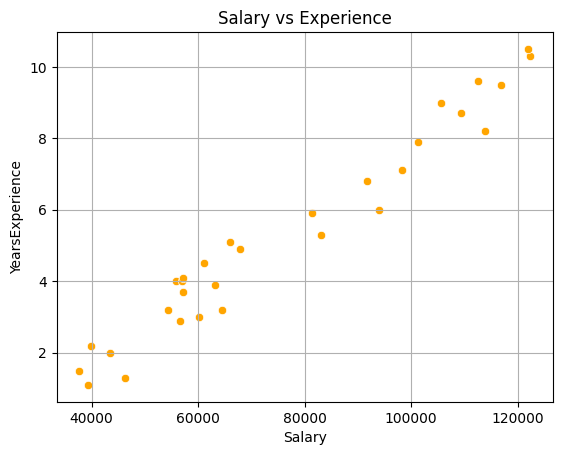

In [22]:
sns.scatterplot(x='Salary', y='YearsExperience', data=df, color='orange')
plt.grid()
plt.title('Salary vs Experience')
plt.show()

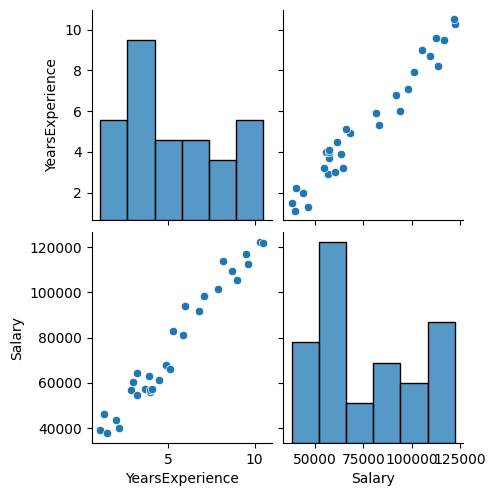

In [23]:
sns.pairplot(df)
plt.show()

<p> A linear trend can be noticed from the plot</p>
<p> Since, there is only one feature, standardization is not performed.</p>

In [24]:
# Split the data frame
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary', axis=1), df['Salary'], test_size=0.2, random_state=42)

<h2>Track Experiments</h2>

In [25]:
models = [
    (
        "Linear Regression",
        {"fit_intercept": True, "positive": False},
        LinearRegression(),
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "Decision Tree Regressor",
        {"max_depth": 5, "min_samples_split": 2},
        DecisionTreeRegressor(),
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "Random Forest Regressor",
        {"n_estimators": 100, "max_depth": 10, "random_state": 42},
        RandomForestRegressor(),
        (X_train, y_train),
        (X_test, y_test)
    )
]


In [26]:
import mlflow
import mlflow.sklearn

# dagshub setup
# mlflow.set_tracking_uri("https://dagshub.com/ranjithkumarneeruganti/MLops_capstone_edureka.mlflow")
import dagshub
dagshub.init(repo_owner='ranjithkumarneeruganti', repo_name='MLops_capstone_edureka', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=e093c10d-498e-4ddc-ae2b-23bed39c6496&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=9c0fa35bb5d81a8ea85bfa527d826039c37e2f2cb58eeddd7076068214ac5872




Accessing as ranjithkumarneeruganti

Initialized MLflow to track repo "ranjithkumarneeruganti/MLops_capstone_edureka"

Repository ranjithkumarneeruganti/MLops_capstone_edureka initialized!

In [27]:
def r2_score(y_true, y_pred):
  """
  Calculates the R-squared (coefficient of determination) score.

  Args:
    y_true: Array-like of true values.
    y_pred: Array-like of predicted values.

  Returns:
    The R-squared score.
  """
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  ss_res = np.sum((y_true - y_pred) ** 2)
  ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)

  return 1 - (ss_res / ss_tot)

<h2>Model training</h2>

In [28]:
# Loop over models and track them in MLflow
for model_name, params, model, train_data, test_data in models:
    X_train, y_train = train_data
    X_test, y_test = test_data

    with mlflow.start_run(run_name=model_name):
        # Log model parameters
        mlflow.log_params(params)

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate and log metrics
        mse = mean_squared_error(y_test, y_pred)
        mlflow.log_metric("mean_squared_error", mse)

        # Calculate and log R2 score
        r2 = r2_score(y_test, y_pred)  # Use the custom R2 score function
        mlflow.log_metric("r2_score", r2)

        # Log the trained model
        mlflow.sklearn.log_model(model, model_name)

        print(f"{model_name}: MSE = {mse}")

print("All experiments have been tracked with MLflow.")

2024/09/05 10:56:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/05 10:56:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Linear Regression at: https://dagshub.com/ranjithkumarneeruganti/MLops_capstone_edureka.mlflow/#/experiments/0/runs/807ad93450284d318c3318d13464d5e0.
2024/09/05 10:56:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/ranjithkumarneeruganti/MLops_capstone_edureka.mlflow/#/experiments/0.


Linear Regression: MSE = 49830096.85590839


2024/09/05 10:56:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/05 10:56:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Decision Tree Regressor at: https://dagshub.com/ranjithkumarneeruganti/MLops_capstone_edureka.mlflow/#/experiments/0/runs/3078de56c0d04d33a1ec5977324d0b25.
2024/09/05 10:56:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/ranjithkumarneeruganti/MLops_capstone_edureka.mlflow/#/experiments/0.


Decision Tree Regressor: MSE = 101047709.83333333


2024/09/05 10:56:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/05 10:56:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Regressor at: https://dagshub.com/ranjithkumarneeruganti/MLops_capstone_edureka.mlflow/#/experiments/0/runs/1d8fb64f29794049bd76ea1e5c4878c3.
2024/09/05 10:56:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/ranjithkumarneeruganti/MLops_capstone_edureka.mlflow/#/experiments/0.


Random Forest Regressor: MSE = 57298579.1319535
All experiments have been tracked with MLflow.
